Используемые библиотеки

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

Первое задание
Дан массив данных
𝑋 = 𝑛𝑝. 𝑎𝑟𝑟𝑎𝑦([[5,3],
[10,15],
[15,12],
[24,10],
[30,45],
[85,70],
[71,80],
[60,78],
[55,52],
[80,91], ])
Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

def task_1_1_2():
    X = np.array([[5, 3],
                  [10, 15],
                  [15, 12],
                  [24, 10],
                  [30, 45],
                  [85, 70],
                  [71, 80],
                  [60, 78],
                  [55, 52],
                  [80, 91]])

    k_values = range(1, 6)  # Попробуем от 1 до 5 кластеров

    titles = [f'k={k}' for k in k_values]

    fig, axes = plt.subplots(1, len(k_values), figsize=(15, 4))

    for k, title, ax in zip(k_values, titles, axes):
        kmeans = KMeans(n_clusters=k, random_state=0)
        clusters = kmeans.fit_predict(X)
        ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, edgecolors='k')
        ax.set_title(title)
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
    plt.tight_layout()
    plt.show()

def main():
    task_1_1_2()

if __name__ == "__main__":
    main()

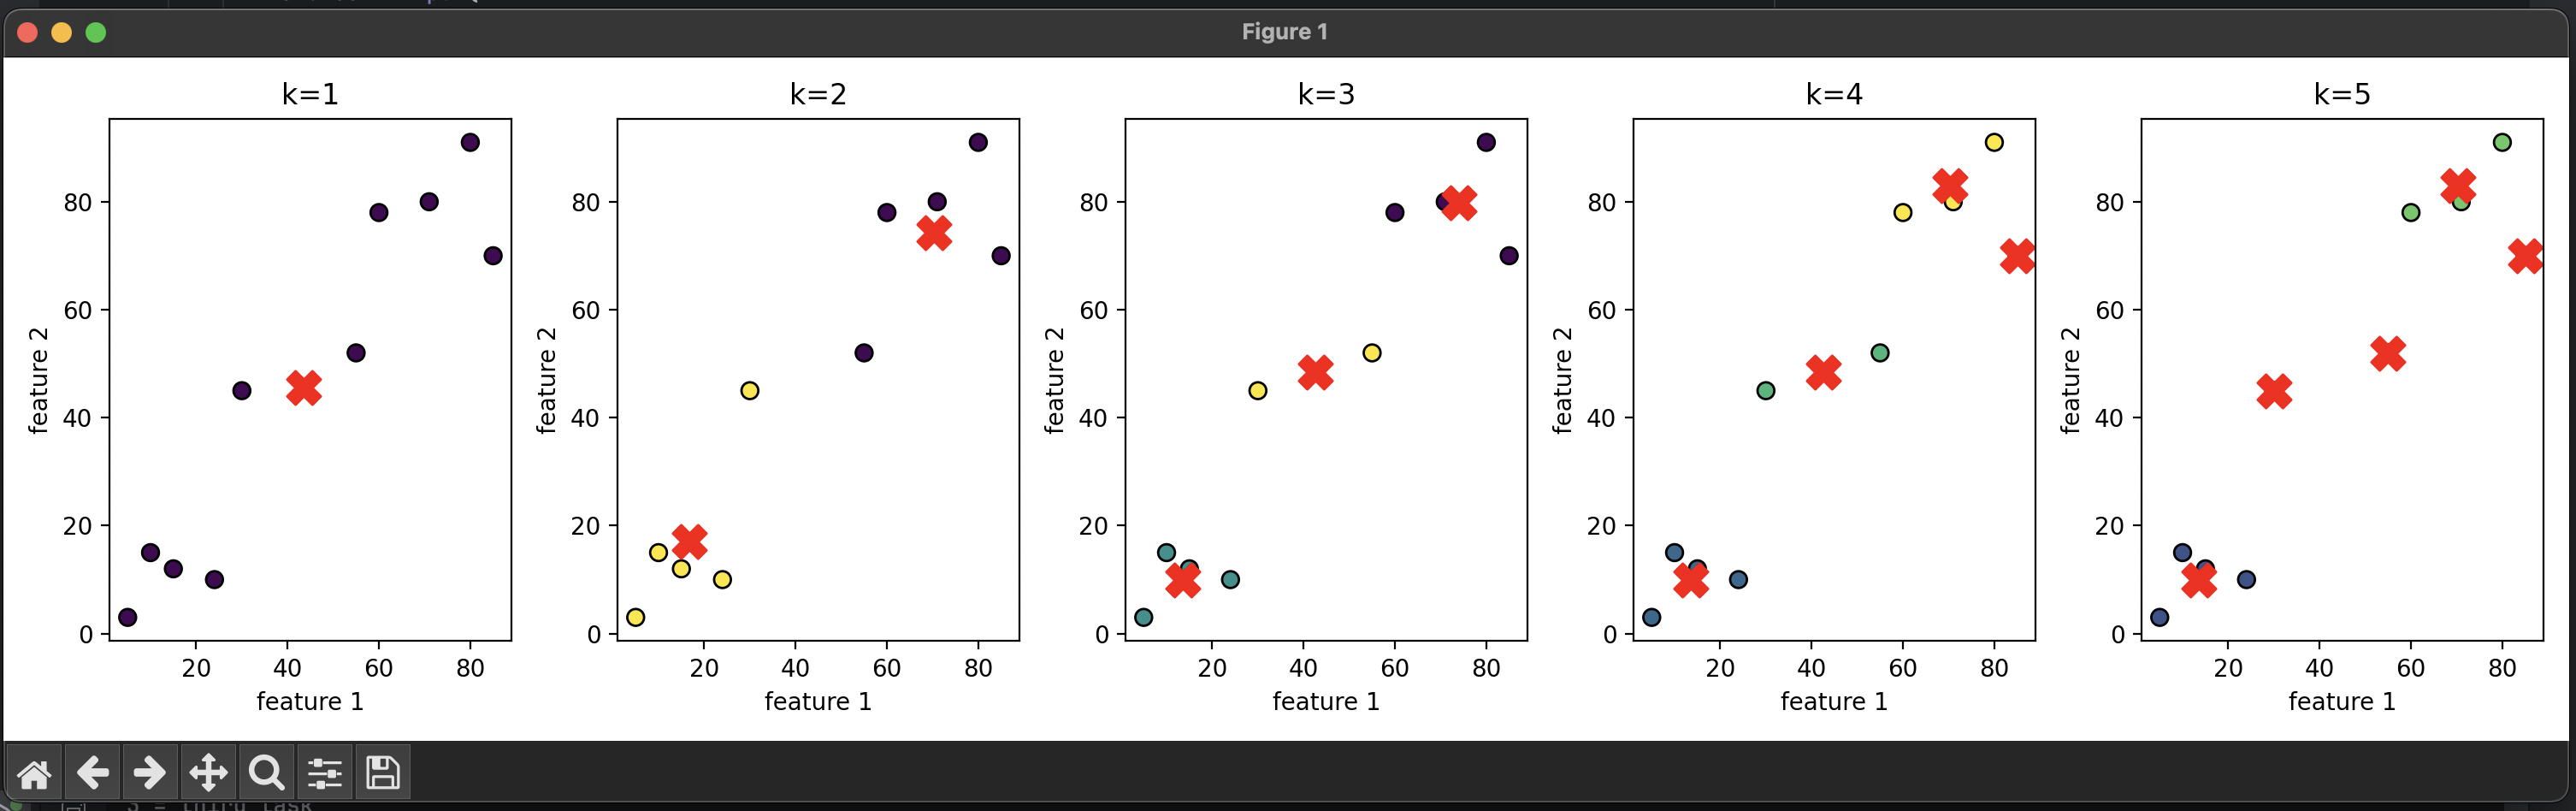

Второе задание:
Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели. Поэкспериментируйте с количеством кластеров.

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

def task_1_1_3():
    iris = datasets.load_iris()
    X = iris.data

    k_values = range(1, 6)

    fig, axes = plt.subplots(1, len(k_values), figsize=(15, 4))

    for k, ax in zip(k_values, axes):
        kmeans = KMeans(n_clusters=k, random_state=0)
        clusters = kmeans.fit_predict(X)
        ax.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, edgecolors='k')
        ax.set_title(f'k={k}')
        ax.set_xlabel('Sepal length')
        ax.set_ylabel('Sepal width')
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
    plt.tight_layout()
    plt.show()


def main():
    task_1_1_3()

if __name__ == "__main__":
    main()

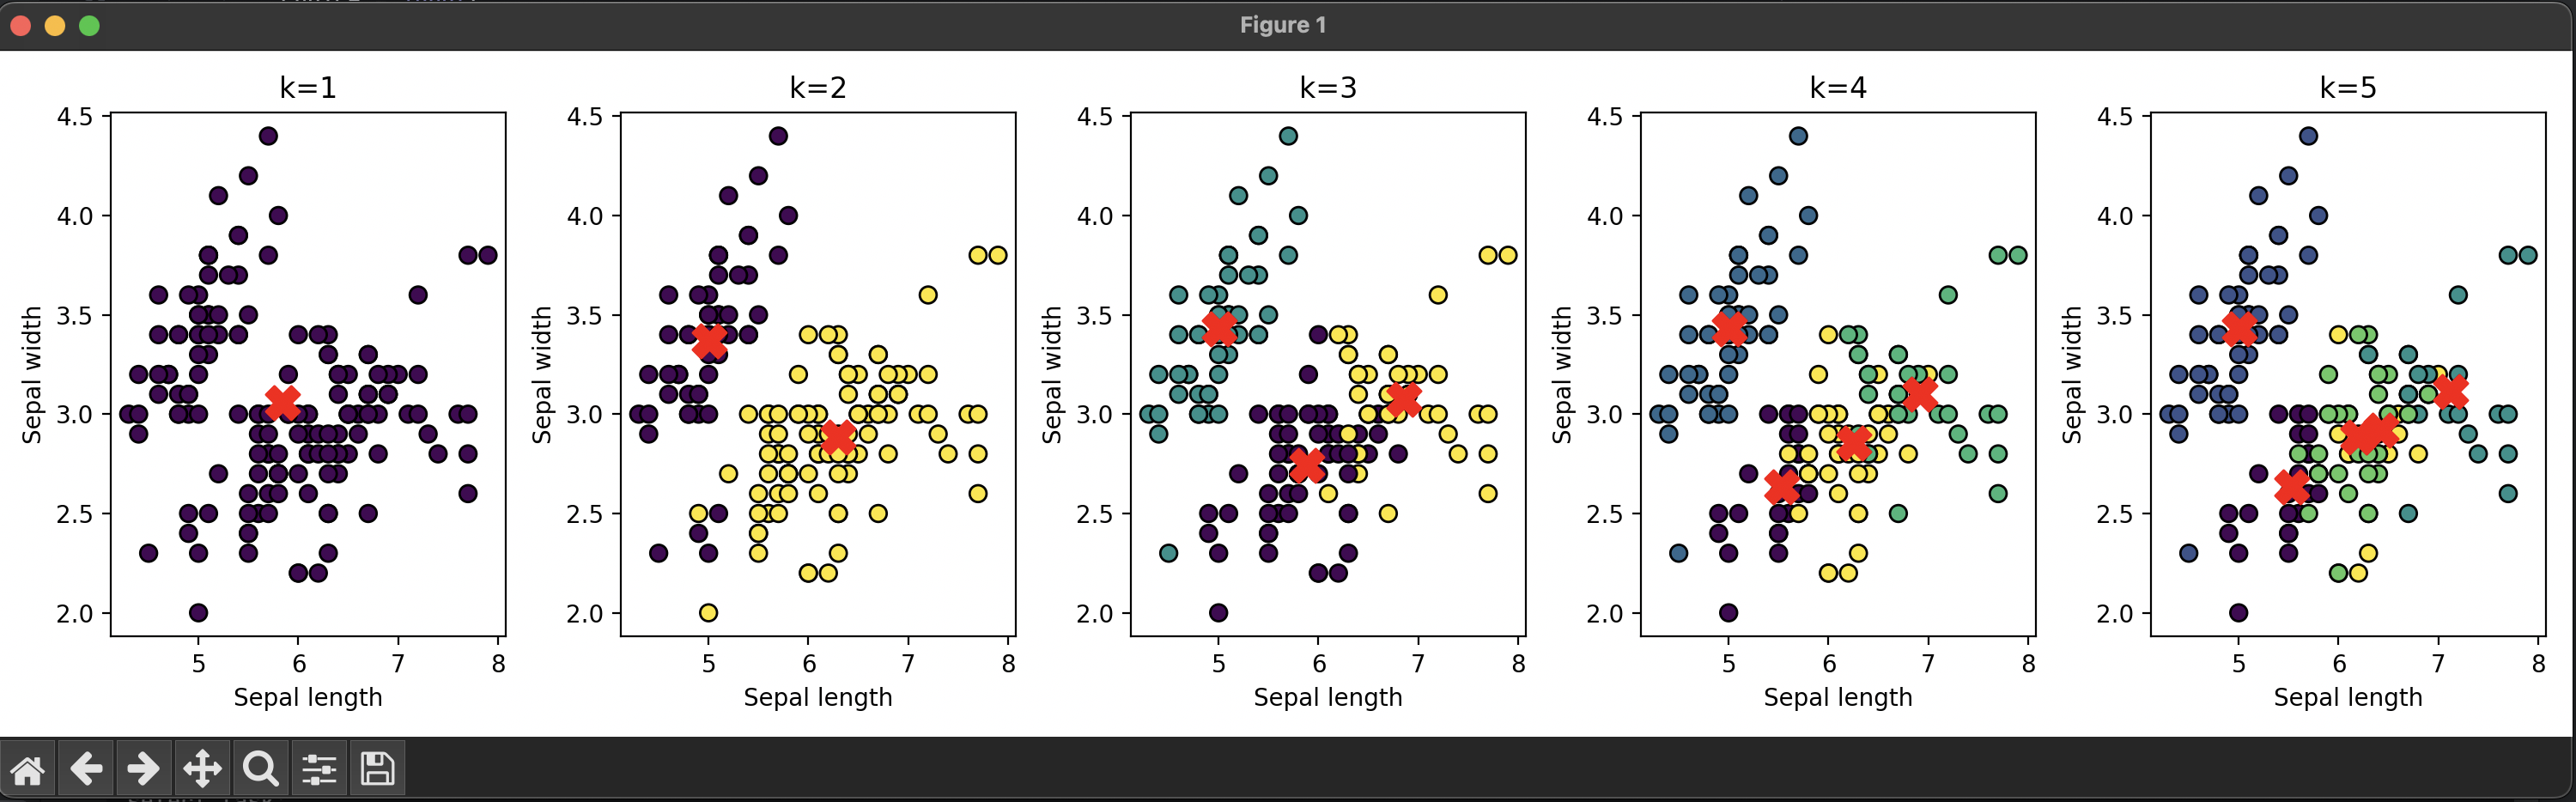

Третье задание:
Задание. Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np

def task_1_1_4():
    iris = datasets.load_iris()
    X = iris.data[:, :2]

    n_clusters = 3
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    clusters = clustering.fit_predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50, edgecolors='k')
    plt.title('Hierarchical Clustering of Iris Dataset')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    def plot_dendrogram(model, **kwargs):
        counts = np.zeros(model.children_.shape[0])
        n_samples = len(model.labels_)
        for i, merge in enumerate(model.children_):
            current_count = 0
            for child_idx in merge:
                if child_idx < n_samples:
                    current_count += 1
                else:
                    current_count += counts[child_idx - n_samples]
            counts[i] = current_count

        linkage_matrix = linkage(X, method='ward')
        dendrogram(linkage_matrix, **kwargs)

    plt.figure(figsize=(15, 8))
    plt.title('Hierarchical Clustering Dendrogram')
    plot_dendrogram(clustering, labels=clustering.labels_)
    plt.xlabel('Sample index')
    plt.ylabel('Cluster distance')
    plt.show()


def main():
    task_1_1_4()

if __name__ == "__main__":
    main()

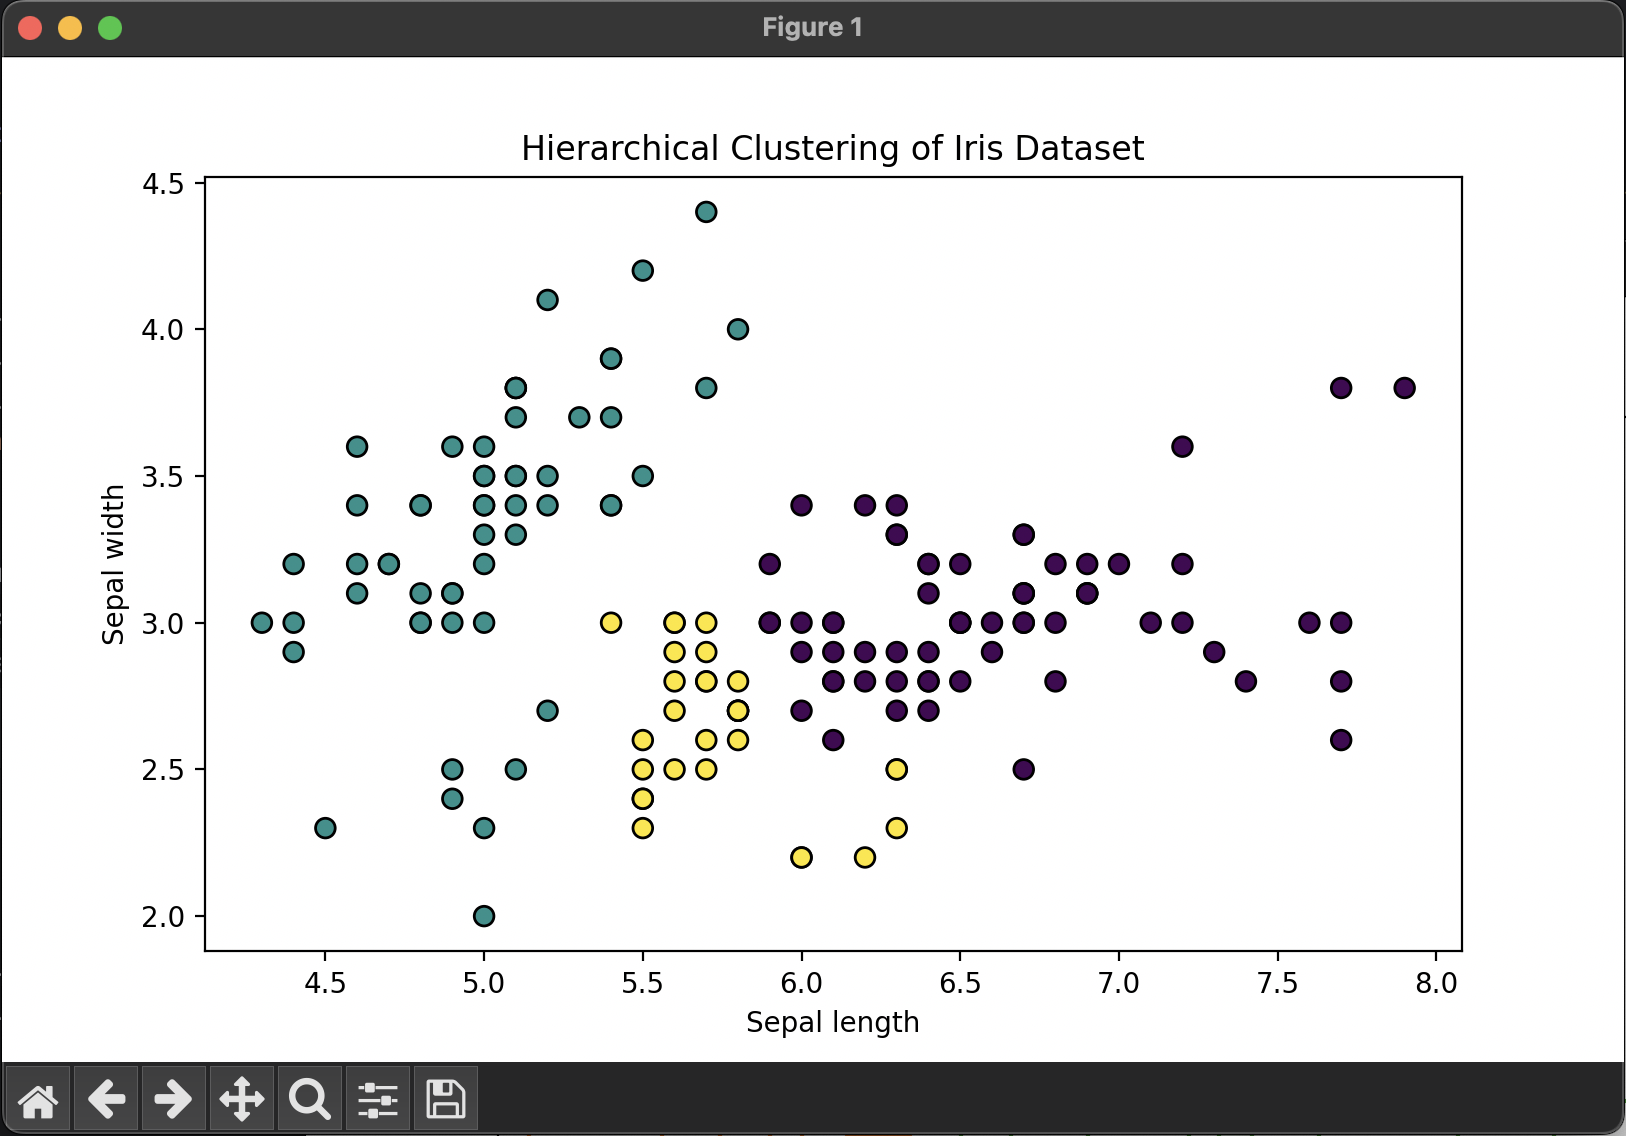

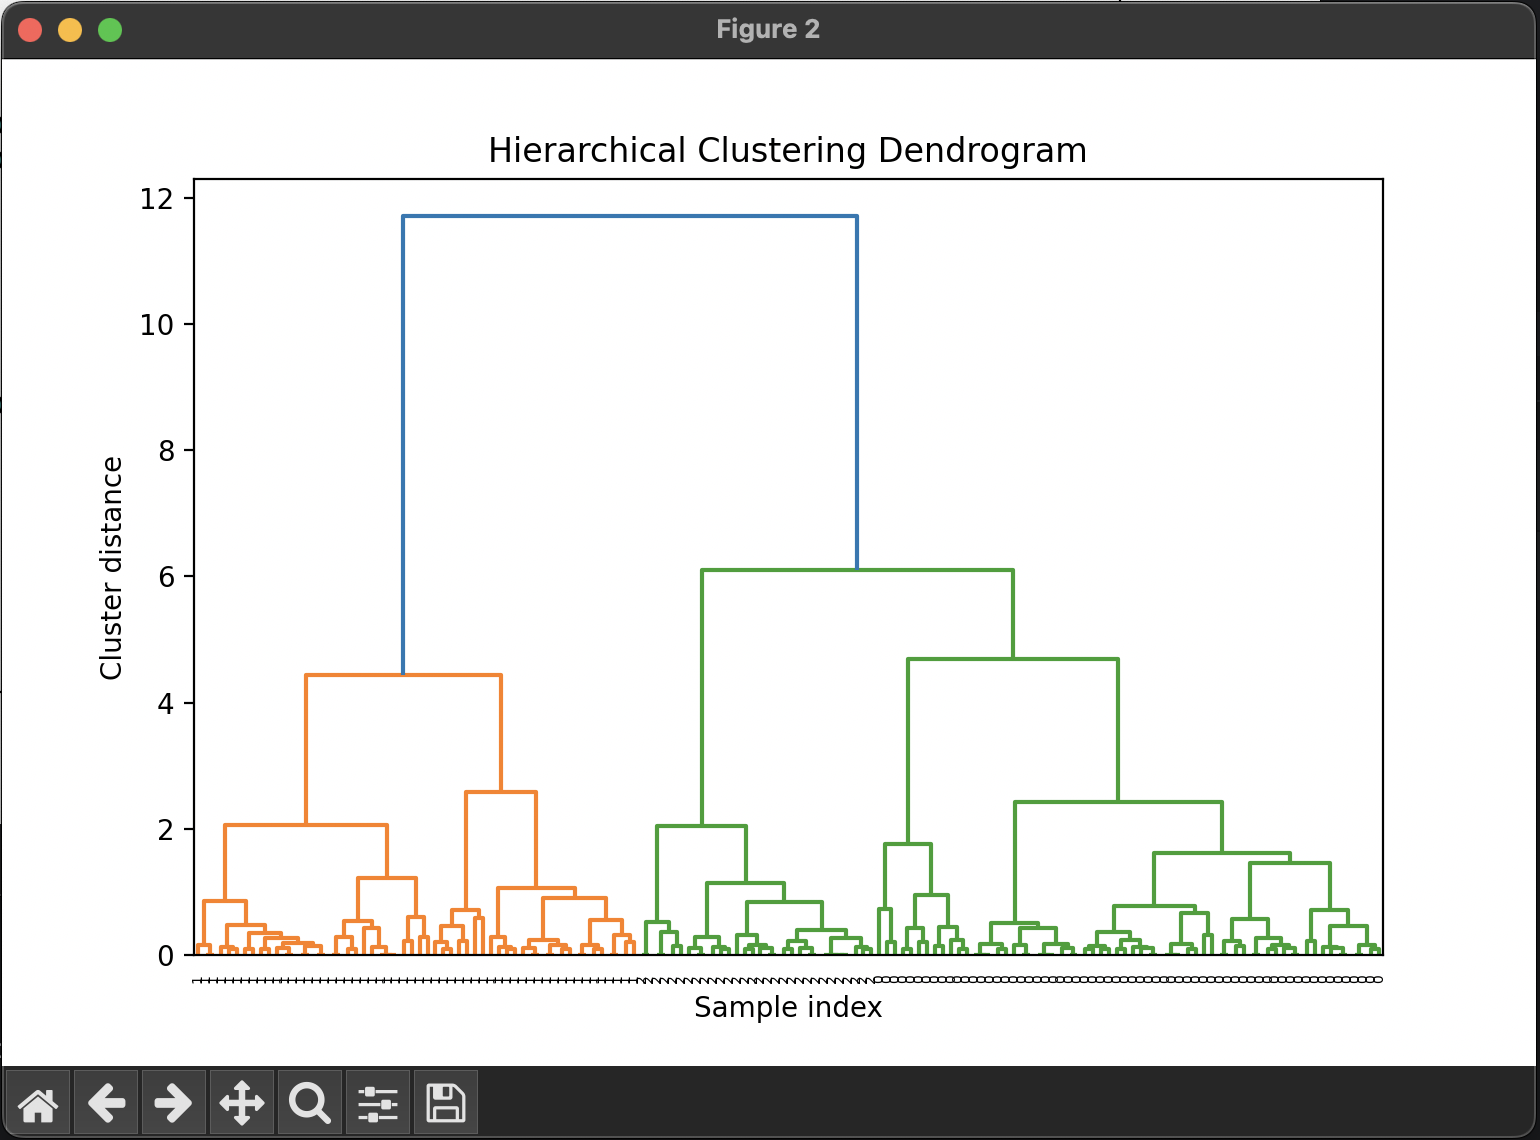

лаунчер заданий

In [ ]:
def main():
    while True:
        choice = input(
            "\nselect task: \n1 = first task \n2 = second task \n3 = third task \n(no option - if you want to exit, enter 'exit'): ")

        menu = {
            '1': task_1_1_2,
            '2': task_1_1_3,
            '3': task_1_1_4,
            'exit': lambda: print("\n\nmain menu!")
        }

        if choice in menu:
            menu[choice]()
            if choice == 'exit':
                return
        else:
            print("invalid choice. please enter a valid option")


if __name__ == "__main__":
    main()